# DS106: Machine Learning Lesson 1- Hands on

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import data

In [5]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [6]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
44788,0.50,Premium,E,VS2,61.4,58.0,1624,5.07,5.12,3.13
8047,0.25,Ideal,G,VVS1,62.6,56.0,582,4.01,4.05,2.52
40940,0.31,Ideal,G,VS2,60.8,56.0,500,4.40,4.42,2.68
6269,1.04,Ideal,I,VS2,62.9,56.0,4013,6.50,6.41,4.06
11334,1.00,Good,E,SI1,62.6,61.0,4989,6.29,6.32,3.95


# Goal: Use carat, cut, color, and clarity to predict the price of diamonds

# Recode the variables to numeric

In [7]:
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
def cut_recode (series):
    if series == "Ideal":
        return 0
    if series == "Premium":
        return 1
    if series == "Very Good":
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [9]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR
44788,0.50,Premium,E,VS2,61.4,58.0,1624,5.07,5.12,3.13,1
8047,0.25,Ideal,G,VVS1,62.6,56.0,582,4.01,4.05,2.52,0
40940,0.31,Ideal,G,VS2,60.8,56.0,500,4.40,4.42,2.68,0
6269,1.04,Ideal,I,VS2,62.9,56.0,4013,6.50,6.41,4.06,0
11334,1.00,Good,E,SI1,62.6,61.0,4989,6.29,6.32,3.95,3


In [10]:
Diamonds.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.22       1
3.11       1
2.59       1
3.50       1
3.51       1
Name: carat, Length: 273, dtype: int64

In [9]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
def color_recode (series):
    if series == "G":
        return 0
    if series == "E":
        return 1
    if series == "F":
        return 2
    if series == "H":
        return 3
    if series == "D":
        return 4
    if series == "I":
        return 5
    if series == "J":
        return 6
Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [13]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR
5440,0.77,Very Good,G,VVS2,62.8,58.0,3829,5.84,5.78,3.65,2,0
52571,0.70,Premium,H,VVS2,62.1,58.0,2536,5.71,5.66,3.53,1,3
47485,0.83,Ideal,H,SI2,61.8,57.0,1863,6.08,5.99,3.73,0,3
22519,1.26,Ideal,G,VVS2,60.7,56.0,10556,7.05,7.03,4.27,0,0
3115,0.92,Fair,F,SI1,66.0,57.0,3323,6.04,5.99,3.97,4,2


In [14]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [16]:
def clarity_recode (series):
    if series == "SI1":
        return 0
    if series == "VS2":
        return 1
    if series == "SI2":
        return 2
    if series == "VS1":
        return 3
    if series == "VVS2":
        return 4
    if series == "VVS1":
        return 5
    if series == "IF":
        return 6
    if series == "I1":
        return 7
Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [17]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
5440,0.77,Very Good,G,VVS2,62.8,58.0,3829,5.84,5.78,3.65,2,0,4
52571,0.70,Premium,H,VVS2,62.1,58.0,2536,5.71,5.66,3.53,1,3,4
47485,0.83,Ideal,H,SI2,61.8,57.0,1863,6.08,5.99,3.73,0,3,2
22519,1.26,Ideal,G,VVS2,60.7,56.0,10556,7.05,7.03,4.27,0,0,4
3115,0.92,Fair,F,SI1,66.0,57.0,3323,6.04,5.99,3.97,4,2,0


# X & Y

In [18]:
x = Diamonds[['cutR', 'carat', 'colorR', 'clarityR']]
y = Diamonds['price']

# Train Test Split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [20]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


# Linear Model

In [21]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examining the Predictions

In [22]:
predictions = lm.predict(x_test)
predictions

array([5554.24680077,  105.15405319, 9499.41684248, ...,  717.1164904 ,
       4561.1390171 , 2868.45139853])

# Graph y_test against the predictors

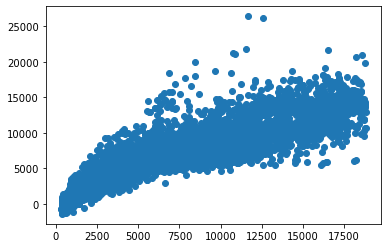

In [23]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [24]:
print("Score:", lm.score(x_test, y_test))

Score: 0.865404445936074


# This model predicts the price of diamonds 86.5% of the time

# Examining the Error

# Mean Absolute Error

In [25]:
metrics.mean_absolute_error(y_test, predictions)

949.858989411351

# Mean Squared Error

In [26]:
metrics.mean_squared_error(y_test, predictions)

2150382.7385621956

# Root Mean Squared Error

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1466.4183368200888

# K-fold cross validation

In [28]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


C:\Users\nolan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [29]:
print(cross_val_score(lm, x,y, cv=3))

[0.86419188 0.86384704 0.86383179]
